# Exercise 1: A Linear Regression Problem - The SteelAI Case

In [1]:
import torch
from torch import autograd
import numpy as np
import matplotlib.pyplot as plt

# DATA: Import data and convert the data into relevant torch tensors.
path = "dataset_SteelAI.csv"
with open(path, encoding = "utf-8") as f:
    my_data = np.loadtxt(path, dtype = "str", delimiter = ",")

# Delete titles of each column.
data = my_data[1:, ]

# Get the x column.
X = data[:,0]
X = np.array(X, dtype = "float")
# THESE SHOULD HAVE requires_grad = FALSE
X = torch.tensor(X, requires_grad = False)

# Get the y column.
y_true = data[:, 1]
y_true = np.array(y_true, dtype = "float")
# THESE SHOULD HAVE requires_grad = FALSE
y_true = torch.tensor(y_true, requires_grad = False)

Text(0, 0.5, 'flexibility coefficent')

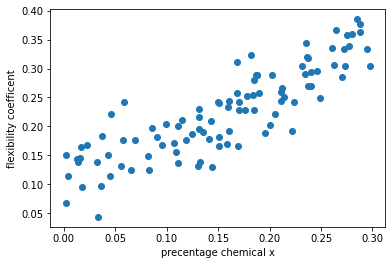

In [2]:
plt.scatter(X, y_true)
plt.xlabel("precentage chemical x")
plt.ylabel("flexibility coefficent")

In [3]:
import torch
from torch import autograd
import numpy as np

# MODEL:
def model(X, a, b):
    fx_output = a * X + b
    return fx_output

# LOSS FUNCTION:
def loss_function(y_preds, y_true):
    return torch.pow(y_true - y_preds, 2.0)

# COST FUNCTION:
def cost_function(y_preds, y_true):
    loss_over_data = loss_function(y_preds, y_true)
    return torch.mean(loss_over_data)

# INITIALIZATION:
# inital guess of params
a = torch.tensor([1.0], requires_grad = True)
# inital guess of params
b = torch.tensor([0.5], requires_grad = True) 

# Set the maximum iteration times
max_iterations = 5000

# Set the step length, eta
eta = 0.01

# Trajectory of cost in each iteration
trajectory_cost = []

# Fitting- / Learning- / Training-loop
for iteration_i in range(max_iterations):
    # Predict from current model with current params
    y_preds = model(X, a, b)

    # Compute loss associated with current params
    cost = cost_function(y_preds, y_true) # How to use loss function?? I could only use the cost function.
    trajectory_cost.append(cost.detach().numpy())

    # Compute gradient of loss function for current params
    cost.backward()

    # Update params via Gradient Decent update
    with torch.no_grad():
        a -= eta * a.grad
        b -= eta * b.grad
    
    # Reset gradients back to zero
    a.grad.zero_()
    b.grad.zero_()
    
    # some stopping criteria fullfiled
    # Compare the difference betweeen two successive cost value
    if iteration_i > 2000:
        if np.abs(trajectory_cost[-1] - trajectory_cost[-2]) < 10e-9:
            break

print(a.item())
print(b.item())

0.8608052134513855
0.09108268469572067


Text(0.5, 1.0, 'Parameters: a = 0.8608052134513855, b = 0.09108268469572067')

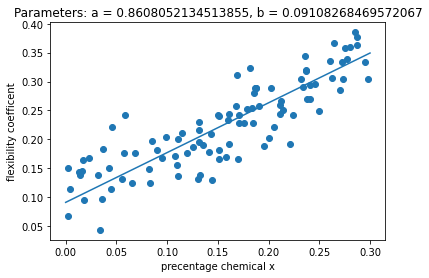

In [4]:
plt.scatter(X, y_true)
plt.xlabel("precentage chemical x")
plt.ylabel("flexibility coefficent")
X = np.linspace(0, 0.3, 500)
y_preds = a.item() * X + b.item()
plt.plot(X, y_preds)
plt.title("Parameters: a = {}, b = {}".format(a.item(), b.item()))

# Exercise 2: Fitting parameters to a non-linear relationship

In [5]:
import torch
from torch import autograd
import numpy as np
import matplotlib.pyplot as plt

# DATA: Import data and convert the data into relevant torch tensors.
path = "dataset_Marvin_Minsky.csv"
with open(path, encoding = "utf-8") as f:
    my_data = np.loadtxt(path, dtype = "str", delimiter = ",")

# Delete titles of each column.
data = my_data[1:, ]

# Get the x column.
X = data[:,0]
X = np.array(X, dtype = "float")
# THESE SHOULD HAVE requires_grad = FALSE
X = torch.tensor(X, requires_grad = False)

# Get the y column.
y_true = data[:, 1]
y_true = np.array(y_true, dtype = "float")
# THESE SHOULD HAVE requires_grad = FALSE
y_true = torch.tensor(y_true, requires_grad = False)

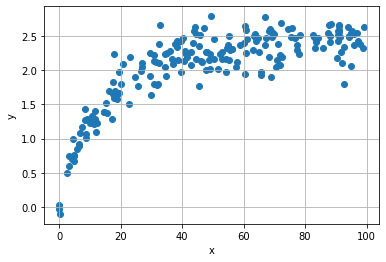

In [6]:
plt.scatter(X, y_true)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

## Which two model family types among the ones consideed in this assignment do you think are most promising to explain the underlying relationhsip between the observed pairs ($xn$, $yn$) shown? Why?


**Answer:** Michaelis-Menten type model and Arrhenius type model.

### Michaelis-Menten type model

In [7]:
import torch
from torch import autograd

# Michaelis-Menten type model f(x; a, b)
def mm_model(X, a, b):
  fx = a * X / (b + X)
  return fx

def loss_function(y_pred, y_true):
  return torch.pow(y_true - y_pred, 2.0)

def cost_function(y_pred, y_true):
  loss = loss_function(y_pred, y_true)
  return torch.mean(loss)

### INITIALIZATION ###
# inital guess of params
a = torch.tensor([1.0], requires_grad = True)
# inital guess of params
b = torch.tensor([0.5], requires_grad = True) 

# Set the maximum iteration times
max_iterations = 100000

# Set the step length, eta
eta = 0.1

# Trajectory of cost
trajectory_cost = []

# Trajectory of iteration round
trajectory_iter = []

# Fitting- / Learning- / Training-loop
for iteration_i in range(max_iterations):
    # Predict from current model with current params
    y_preds = mm_model(X, a, b) # Use Michaelis-Menten type model

    # Compute loss associated with current params
    cost = cost_function(y_preds, y_true)
    trajectory_cost.append(cost.detach().numpy())

    trajectory_iter.append(iteration_i)

    # Compute gradient of loss function for current params
    cost.backward()

    # Update params via Gradient Decent update
    with torch.no_grad():
        a -= eta * a.grad
        b -= eta * b.grad
    
    # Reset gradients back to zero
    a.grad.zero_()
    b.grad.zero_()
    
    # some stopping criteria fullfiled
    # Compare the difference betweeen two successive cost value
    if iteration_i > 2000:
        if np.abs(trajectory_cost[-1] - trajectory_cost[-2]) < 10e-9:
            break

print(a.item())
print(b.item())

2.7629313468933105
11.09881591796875


Text(0.5, 0, 'iteration rounds')

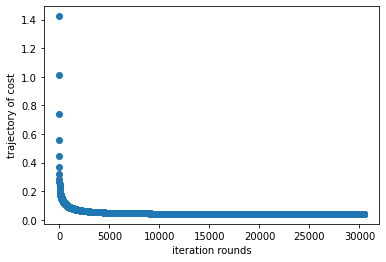

In [8]:
plt.scatter(trajectory_iter, trajectory_cost)
plt.ylabel("trajectory of cost")
plt.xlabel("iteration rounds")

In [9]:
print(trajectory_cost[-1])

0.04042788028508393


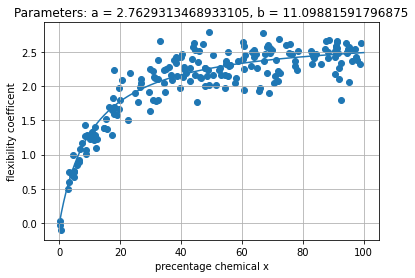

In [10]:
plt.scatter(X, y_true)
plt.xlabel("precentage chemical x")
plt.ylabel("flexibility coefficent")
x = np.linspace(0, 100, 1000)
y_preds = mm_model(x, a.item(), b.item())
plt.plot(x, y_preds)
plt.title("Parameters: a = {}, b = {}".format(a.item(), b.item()))
plt.grid()

### Arrhenius type model:

In [11]:
import torch
from torch import autograd

# Arrhenius type model f(x; a, b)
def a_model(X, a, b):
  fx = a * torch.exp(-b/X)
  return fx

def loss_function(y_pred, y_true):
  return torch.pow(y_true - y_pred, 2.0)

def cost_function(y_pred, y_true):
  loss = loss_function(y_pred, y_true)
  return torch.mean(loss)

# INITIALIZATION:
# inital guess of params
a = torch.tensor([1.0], requires_grad = True)
# inital guess of params
b = torch.tensor([0.5], requires_grad = True)

X = torch.tensor(X, requires_grad = False)

# Trajectory of cost
trajectory_cost = []

# Trajectory of iteration round
trajectory_iter = []

# Set the maximum iteration times
max_iterations = 50000 * 2

# Set the step length, eta
eta = 0.1

# Fitting- / Learning- / Training-loop
for iteration_i in range(max_iterations):
    # Predict from current model with current params
    y_preds = a_model(X, a, b) # Use Bell-curve type model

    # Compute loss associated with current params
    cost = cost_function(y_preds, y_true)

    trajectory_cost.append(cost.detach().numpy())

    trajectory_iter.append(iteration_i)

    # Compute gradient of loss function for current params
    cost.backward()

    # Update params via Gradient Decent update
    with torch.no_grad():
        a -= eta * a.grad
        b -= eta * b.grad
    
    # Reset gradients back to zero
    a.grad.zero_()
    b.grad.zero_()
    
    # # some stopping criteria fullfiled
    if iteration_i > 2000:
        if np.abs(trajectory_cost[-1] - trajectory_cost[-2]) < 10e-9:
            break

print(iteration_i)
print(a.item())
print(b.item())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


9696
2.606421709060669
6.832805633544922


Text(0.5, 1.0, 'Parameters: a = 2.606421709060669, b = 6.832805633544922')

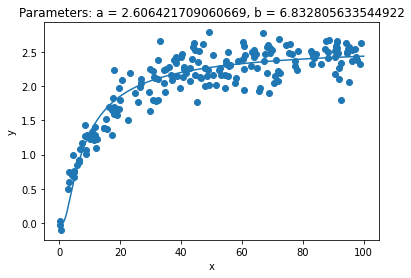

In [12]:
plt.scatter(X, y_true)
plt.xlabel("x")
plt.ylabel("y")
x = np.linspace(0, 100, 1000)
x = torch.tensor(x, requires_grad = False)
y_preds = a_model(x, a.item(), b.item())
plt.plot(x, y_preds)
plt.title("Parameters: a = {}, b = {}".format(a.item(), b.item()))

In [13]:
print(trajectory_cost[-1])

0.04330844574037747


Text(0.5, 0, 'iteration rounds')

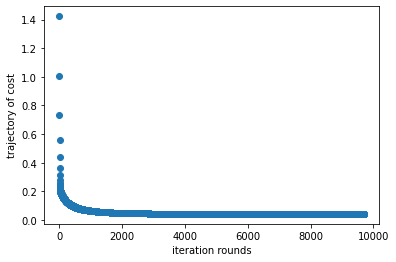

In [14]:
plt.scatter(trajectory_iter, trajectory_cost)
plt.ylabel("trajectory of cost")
plt.xlabel("iteration rounds")